In [1]:
from SDE_tools import DiffusionTools
from SDE_dataclass import LabeledDataset
from SDE_model import UNet
from SDE_utils import *

In [2]:
dataloader = get_data()

images, labels = next(iter(dataloader))
images.shape

torch.Size([10, 3, 128, 128])

In [3]:
concatenated_images = concatenate_images(images, labels)
concatenated_images.shape

torch.Size([10, 6, 128, 128])

In [4]:
structures = concat_to_batchsize(images, 5)
structures.shape

torch.Size([5, 3, 128, 128])

In [5]:
image, label = split_images(concatenated_images)
image.shape, label.shape

(torch.Size([10, 3, 128, 128]), torch.Size([10, 3, 128, 128]))

In [6]:
image[0].shape

torch.Size([3, 128, 128])

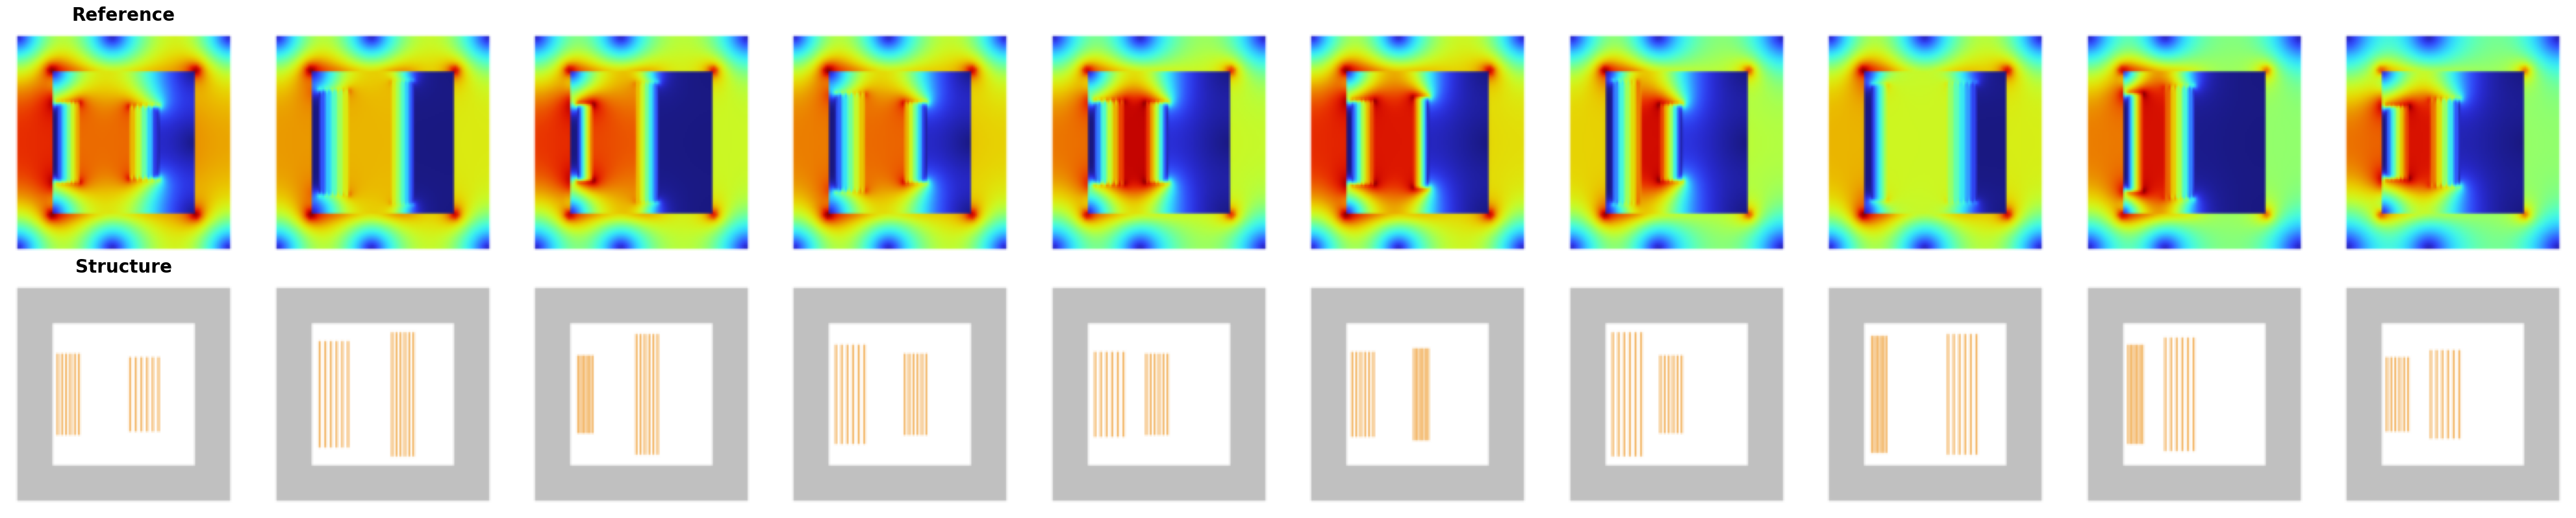

In [7]:
images = tensor_to_PIL(images)
labels = tensor_to_PIL(labels)
save_images(reference_images=images, structure_images=labels)

In [8]:
model = UNet()
model.load_state_dict(torch.load(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_conditioned_128_500\models\SDE_conditioned_128_500_final.pth"))
model.eval()

UNet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=128, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=128, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (transform)

999it [10:06,  1.65it/s]


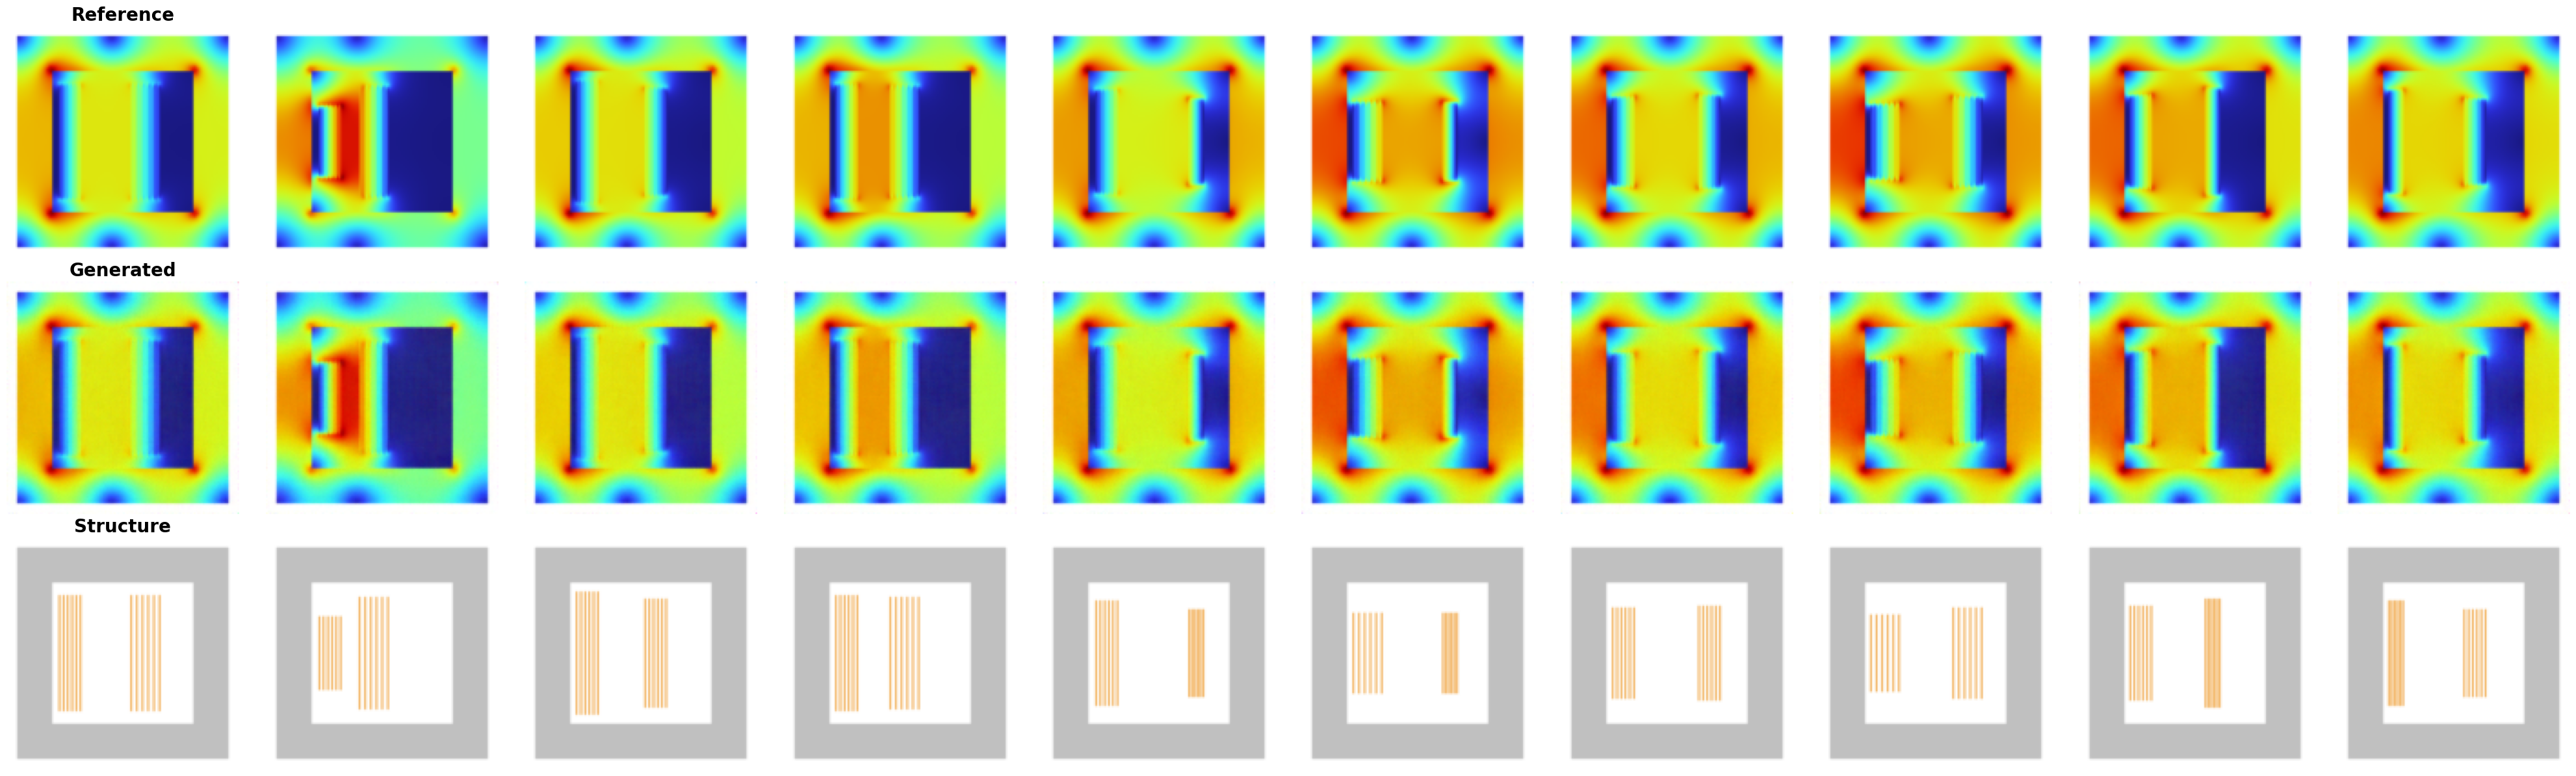

In [10]:
sampler = DiffusionTools()
save_model_output(model, sampler,n=10, path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_conditioned_128_500")